

# > **Marketing Campaign for Banking Products**



**Table of Content** :

1. Project Purpose
2. Loading Dataset
3. Data Cleaning
4. Exploratory Data Analysis
5. Splitting the Data & Feature Transformation
6. Machine Learning Model
7. Comparison of Classifiers
8. Business Model

# 1) Project Purpose 

•	The bank has a growing customer base and wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans.

•	The bank wants to convert the liability-based customers to personal loan customers (while retaining them as depositors). 

•	A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 

•	The department wants you to build a model that will help to identify the potential customers who have a higher probability of purchasing the loan. 

•	So, this project aims to predict the target customer profile for the bank.

•	This will increase the efficiency of the campaign and also reduce the customer unsatisfaction over such campaigns.


   




**Attributes provided of Customer :**

ID - Customer ID

Age - Customer age in completed years

Experience - Years of Professional Experience

Income - Annual Income

ZIP Code - Home Address Code

Family - Family Size

CCAvg - Average Spending on Credit Card month

Education - Education Level 

1. Undergraduate 2. Graduate 3. Advanced/Professional

Mortgage -  Value of House mortgage 

Securities account - Does the customer has securities account with bank  ?

CD account - Does the customer has certificate of deposit CD account bank ?

Online - Does the customer use internet banking Facilities ?

Credit Card - Does the customer use credit card issued by bank ?

Personal loan - did the customer take Personal Loan ?

# 2) Load Datasets and Libraries


*   Excel Sheet has been converted to csv format for loading purpose.
*   Pandas Library is used to load csv as dataframe.




In [353]:
#Importing libraries and Bank dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("Bank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [354]:
#to aviod any error due to typing mistakes
df.columns = df.columns.str.lower()

In [355]:
#Top 5 rows of data to have a overview of column names.
df.head()

,id,age,experience,income,zip code,family,ccavg,education,mortgage,securities account,cd account,online,creditcard,personal loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [313]:
#Last 5 rows
df.tail()

,id,age,experience,income,zip code,family,ccavg,education,mortgage,securities account,cd account,online,creditcard,personal loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0


In [314]:
#check data-type and missing values if any.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   securities account  5000 non-null   int64  
 10  cd account          5000 non-null   int64  
 11  online              5000 non-null   int64  
 12  creditcard          5000 non-null   int64  
 13  personal loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation :
1.   No Missing Values
2.   All are integer type except CCAvg attribute i.e Credit Card Spending



In [315]:
#Provides Summary Statistics about data
df.describe()

,id,age,experience,income,zip code,family,ccavg,education,mortgage,securities account,cd account,online,creditcard,personal loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Observation :
1.   Experience can't be negative (Faulty data)
2.   Income attribute has large range for the higher 25% data which contributes to increase the mean. (Noise)
3. Age and experience can have relation.
4. 50% of people dont have mortgage.
5. Most of the people dont have securtities account and CD account
6. There are people who have spending by credit card  but dont have credit card of given bank. 
7. ID Attribute does not contribute any meaning to analysis.

Actions :
*   Delete ID column
*   Find relation between age and experience











# **3) Data Cleaning**

In [316]:
#delete ID column
df2 = df.drop("id",axis="columns")
df2.shape

(5000, 13)

In [317]:
#find correlation between age and expererience
correlation = df2['experience'].corr(df2['age'])
correlation

0.9942148569683321

In [318]:
#Experience attribute can be dropped since it is high co-related to Age
df3 = df2.drop("experience",axis = "columns")
df3.head()

,age,income,zip code,family,ccavg,education,mortgage,securities account,cd account,online,creditcard,personal loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1,0


In [319]:
#count of outliers in every attribute
#outliers are values which are more than 3 standard deviation away from mean
from scipy.stats import zscore
df4 = df3.copy() 
df5 = df3[['age','income','zip code','ccavg','mortgage']]
#adding column for zscore of attribute
for column in df5 :
  
    df4["zscore"] = zscore(df4[column])

#condition to find outliers  
    condition = ( df4["zscore"] > 3 ) | ( df4["zscore"] < -3 )
    
    df4.drop(df4[condition].index,axis = 'index',inplace = True)


In [320]:
df4['personal loan'].value_counts()

0    4373
1     404
Name: personal loan, dtype: int64

In [321]:
df4.shape           #223 rows are removed 

(4777, 13)

In [322]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4777 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4777 non-null   int64  
 1   income              4777 non-null   int64  
 2   zip code            4777 non-null   int64  
 3   family              4777 non-null   int64  
 4   ccavg               4777 non-null   float64
 5   education           4777 non-null   int64  
 6   mortgage            4777 non-null   int64  
 7   securities account  4777 non-null   int64  
 8   cd account          4777 non-null   int64  
 9   online              4777 non-null   int64  
 10  creditcard          4777 non-null   int64  
 11  personal loan       4777 non-null   int64  
 12  zscore              4777 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 522.5 KB


# 4) Exploratory Data Analysis

In [323]:
df4.nunique(axis='index')

age                    45
income                157
zip code              464
family                  4
ccavg                  90
education               3
mortgage              258
securities account      2
cd account              2
online                  2
creditcard              2
personal loan           2
zscore                258
dtype: int64

In [324]:
#condition to subset people with zero mortgage

condition2 = df4['mortgage'] == 0

#subsetting rows to find the count of people
zero__mort_count = df4.loc[condition2,'mortgage'].count()
zero__mort_count

3376

In [325]:
#condition to find people having zero CC Spending
condition3 = df4['ccavg'] == 0

#subsetting the rows
zero_ccavg_count = df4.loc[condition3,'ccavg'].count()
zero_ccavg_count

104

In [326]:
#create dictionary of value count

value_count = {}
for column in df4 :
  
  if column != 'zscore' :
    
    value_count[column] = df4[column].value_counts()

**Uni-Variate analysis & Multi-variate analysis**

In [327]:
value_count['age']

43    142
35    142
58    137
52    137
54    136
30    134
50    132
41    131
59    130
56    130
39    127
34    126
57    125
40    125
55    124
51    124
31    124
60    122
62    121
61    120
46    118
45    118
42    116
29    116
32    116
33    113
48    112
44    110
38    109
47    109
49    108
53    104
36    104
63    102
28    100
37     98
27     85
65     79
64     74
26     72
25     53
24     25
66     24
67     12
23     11
Name: age, dtype: int64

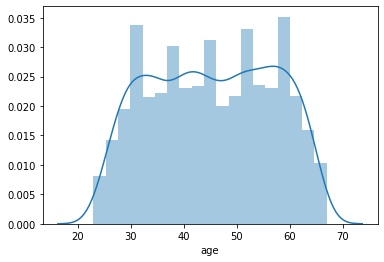

In [328]:
sns.distplot(df4['age'])

observation :

1. Age has almost normal distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


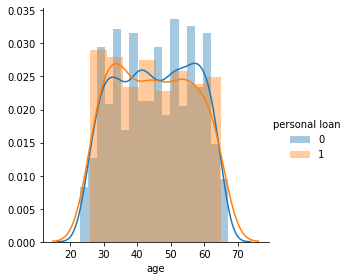

In [329]:
sns.FacetGrid(df4,hue = 'personal loan',size = 4).map(sns.distplot,'age').add_legend()

observation :

1) age group between 35 to 40 has the least count and 25 to 35 has the maximum count of loan customers

2)distribution is almost normal



In [330]:
value_count['ccavg']

0.30    238
1.00    229
0.20    202
0.80    186
0.10    183
       ... 
4.75      1
3.25      1
2.75      1
4.67      1
5.33      1
Name: ccavg, Length: 90, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


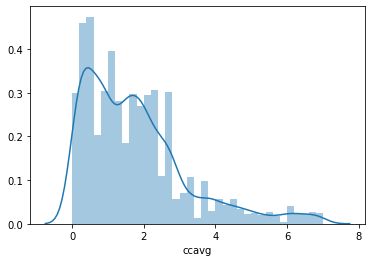

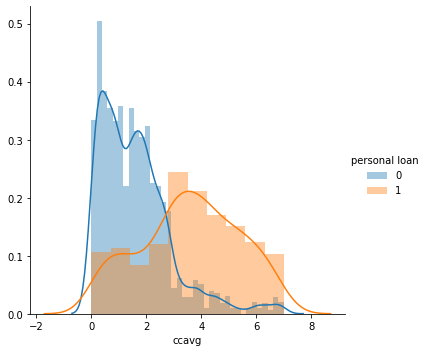

In [331]:
sns.distplot(df4['ccavg'])
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.distplot,'ccavg').add_legend()

observation:

1. As distribution is left-skewed distribution so it will need feature transformation to reduce skewness.
2. Count of loan customers having credit card spending between 2.5 to 4.2 is high though less data of customers in this range is available.

In [332]:
value_count['income']

44     85
38     84
81     83
41     82
39     81
       ..
151     3
204     2
198     2
189     1
205     1
Name: income, Length: 157, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


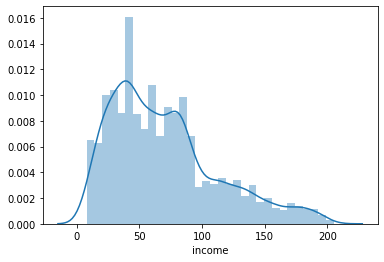

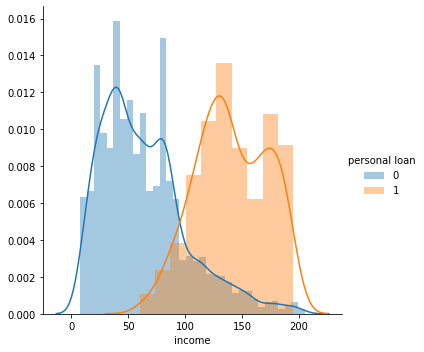

In [333]:
sns.distplot(df4['income'])
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.distplot,'income').add_legend()

observation :

1. left-skewed distribution of income
2. Clearly loan customers have income above 70 and max count is between (125,150) & (175,190)
3. Conversion rate of campaign is high among customers having income above 100.

In [334]:
value_count['zip code']

94720    163
94305    125
95616    112
90095     70
93943     53
        ... 
94404      1
95193      1
90813      1
94970      1
94965      1
Name: zip code, Length: 464, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


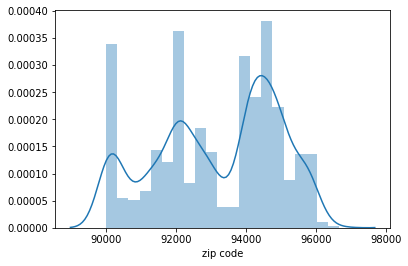

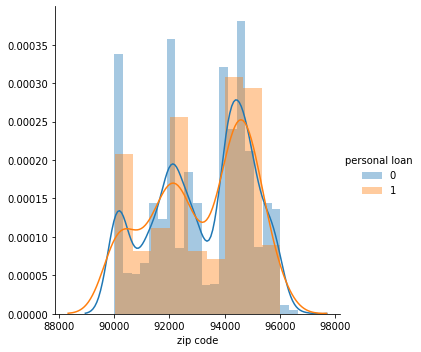

In [335]:
sns.distplot(df4['zip code'])
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.distplot,'zip code').add_legend()

observation :

1. Zip code is a categorical data 
2. it will be difficult to classify, given large number of categories 

In [336]:
df4.drop('zip code',axis = 1, inplace= True)
df4.head()

,age,income,family,ccavg,education,mortgage,securities account,cd account,online,creditcard,personal loan,zscore
0,25,49,4,1.6,1,0,1,0,0,0,0,-0.558493
1,45,34,3,1.5,1,0,1,0,0,0,0,-0.558493
2,39,11,1,1.0,1,0,0,0,0,0,0,-0.558493
3,35,100,1,2.7,2,0,0,0,0,0,0,-0.558493
4,35,45,4,1.0,2,0,0,0,0,1,0,-0.558493


In [337]:
value_count['family']

1    1402
4    1197
2    1195
3     983
Name: family, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


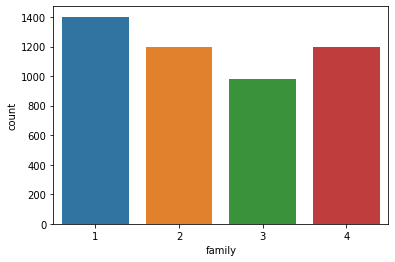

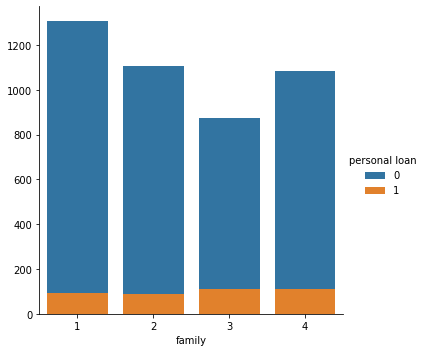

In [338]:
sns.countplot(df4['family'])
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.countplot,'family').add_legend()

observation :

1. dataset has less samples of family of 3 yet has almost equal count of loan customers as of other values.

Text(0.5, 1.0, 'Percentage distribution of family size in Loan Customer')

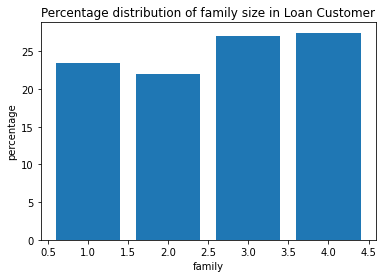

In [356]:
per_count_family = df4.loc[df['personal loan'] == 1]

values_count=per_count_family['family'].value_counts()

count= per_count_family['family'].count()

perc_count_family = (values_count/count)*100
perc_count_family_df = pd.DataFrame(perc_count_family,index = range(1,5)) 

x = perc_count_family_df.index
y = perc_count_family_df['family']

plt.bar(x,y)
plt.ylabel("percentage")
plt.xlabel('family')
plt.title("Percentage distribution of family size in Loan Customer")

In [340]:
condition = (df4['personal loan'] == 1)
temp = df4[condition]

x = temp['family'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','family']

RED - Family of 1
GREEN - Family of 2
ORANGE - Family of 3
BLUE - Family of 4



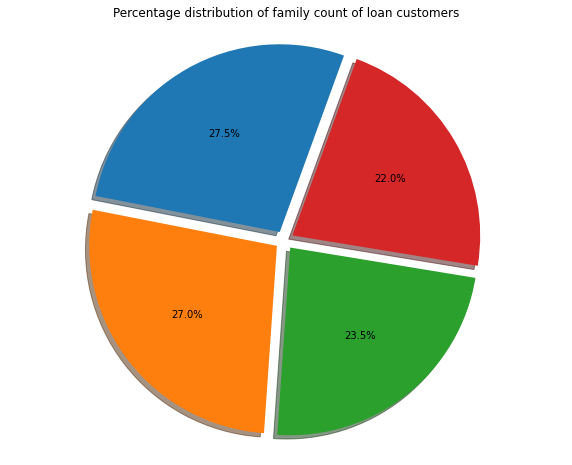

In [341]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0.05,0.05,0.05,0.05)
ax1.pie(temp_df['family'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')

plt.title("Percentage distribution of family count of loan customers")
print('RED','- Family of 1')
print('GREEN','- Family of 2')
print('ORANGE','- Family of 3')
print('BLUE','- Family of 4')
print()

observation :

1. Count of Loan Customers is more for family size 3 & 4.

2. This stats maybe due to their higher expenditure generating a need for Loan. 

In [342]:
value_count['education']

1    1940
3    1462
2    1375
Name: education, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


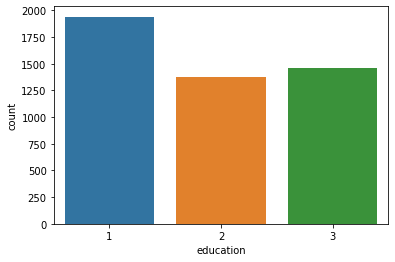

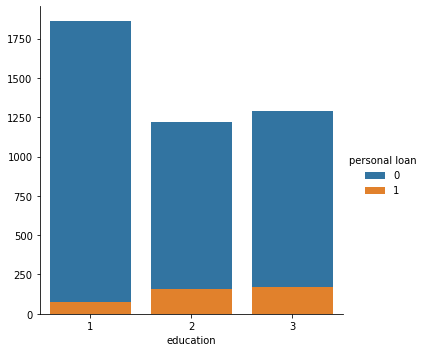

In [343]:
sns.countplot(df4['education'])
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.countplot,'education',).add_legend()

In [344]:
#percentage of customers in each level of education

condition = (df4['personal loan'] == 1)
temp = df4[condition]

x = temp['education'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','education']

GREEN - Under-Graduate
ORANGE - Graduate
BLUE - Advanced/Professional



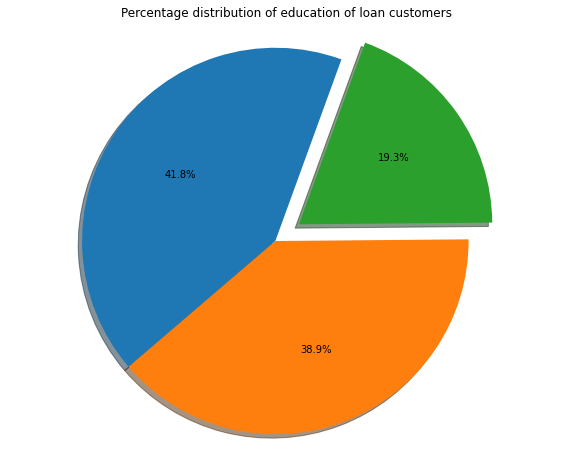

In [345]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.0,0.15)
ax1.pie(temp_df['education'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')

plt.title("Percentage distribution of education of loan customers")
print('GREEN','- Under-Graduate')
print('ORANGE','- Graduate')
print('BLUE','- Advanced/Professional')
print()

observation :

1. Customers which are undergraduate level educated has least conversion count.
2. Customers which are graduate level educated has moderate count of loan customers.
2. Customers which are advanced/professional educated level has highest count of loan customers.

In [346]:
value_count['mortgage']

0      3376
98       17
103      16
91       16
83       16
       ... 
173       1
344       1
336       1
300       1
345       1
Name: mortgage, Length: 258, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


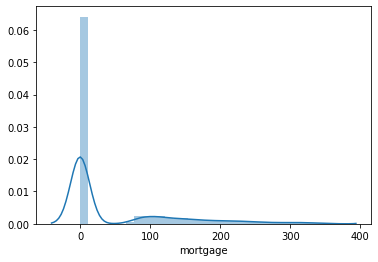

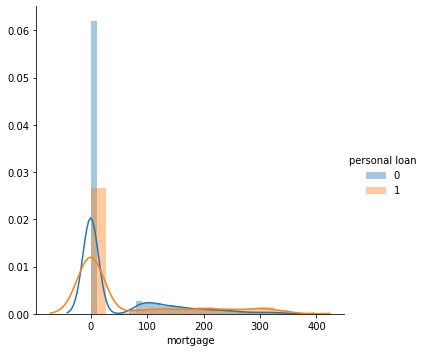

In [347]:
sns.distplot(df4['mortgage'])
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.distplot,'mortgage').add_legend()

In [348]:
value_count['personal loan']

0    4373
1     404
Name: personal loan, dtype: int64

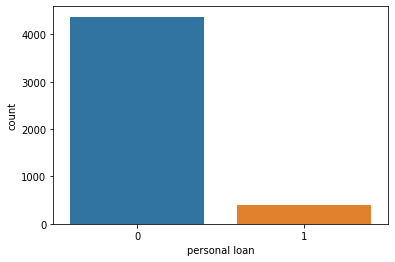

In [349]:
sns.countplot( df4['personal loan'] )

In [350]:
value_count['securities account']

0    4277
1     500
Name: securities account, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


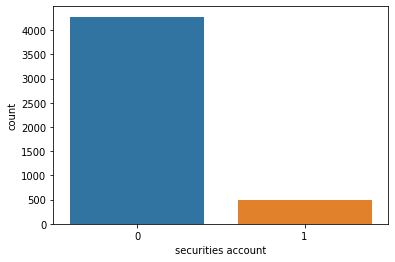

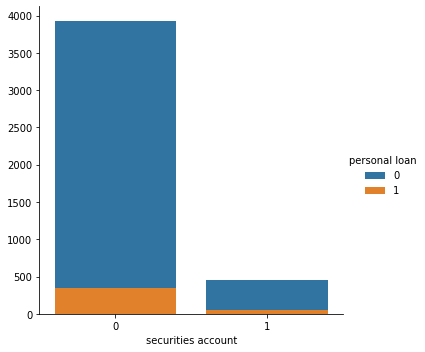

In [351]:
sns.countplot( df4['securities account'] )
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.countplot,'securities account').add_legend()


In [357]:
condition = (df4['securities account'] == 1)
temp = df4[condition]

x = temp['personal loan'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','personal loan']
 

Text(0.5, 1.0, 'Percentage of CD account customers which has taken loan')

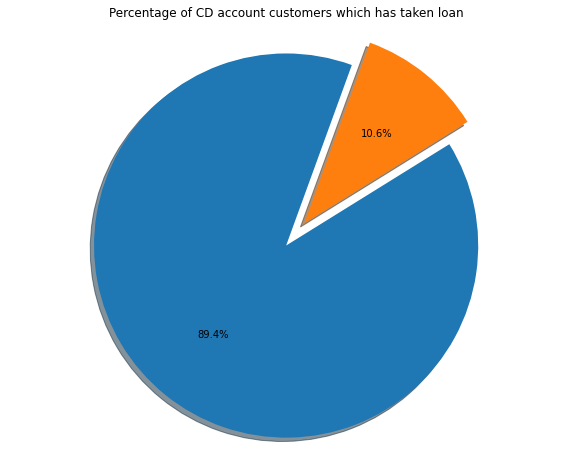

In [358]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.15)
ax1.pie(temp_df['personal loan'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')
plt.title('Percentage of CD account customers which has taken loan')

observation :

only 11.5% securities account customers are also loan customers

In [359]:
value_count['cd account']

0    4507
1     270
Name: cd account, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


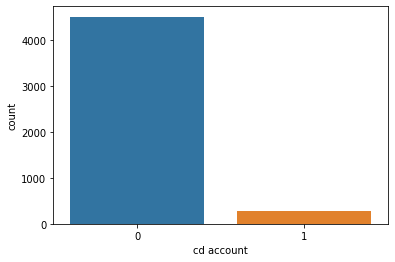

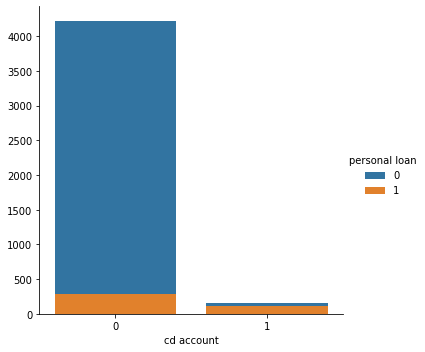

In [360]:
sns.countplot( df4['cd account'] )
sns.FacetGrid(df4,hue = 'personal loan',size = 5,).map(sns.countplot,'cd account').add_legend()


In [361]:
condition = (df4['cd account'] == 1)
temp = df4[condition]

x = temp['personal loan'].value_counts()
temp_df = pd.DataFrame(x.reset_index())
temp_df.columns = ['labels','personal loan']

 

Text(0.5, 1.0, 'Percentage distribution of cd account attribute of total loan customrs')

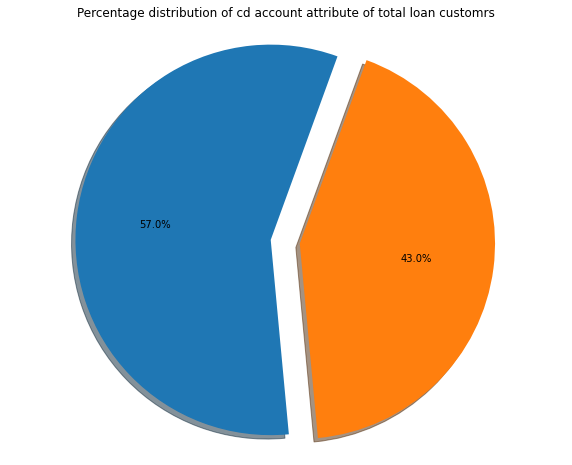

In [362]:
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.15)
ax1.pie(temp_df['personal loan'],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')
plt.title("Percentage distribution of cd account attribute of total loan customrs")

observation :

46.4% cd account customers are also loan customers in the bank which is almost half the total count.

In [363]:
value_count['online']

1    2850
0    1927
Name: online, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


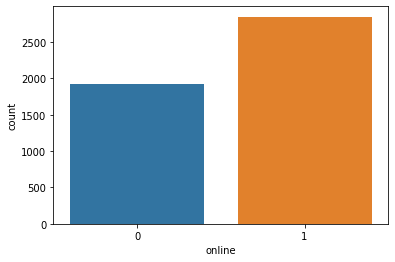

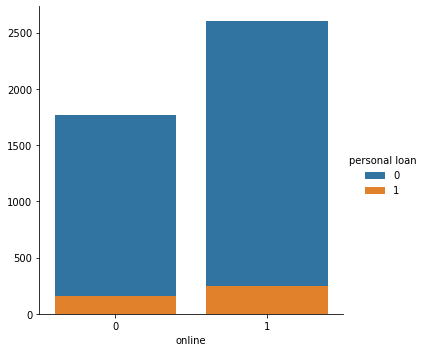

In [364]:
sns.countplot( df4['online'] )
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.countplot,'online').add_legend()

In [365]:
value_count['creditcard']

0    3365
1    1412
Name: creditcard, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


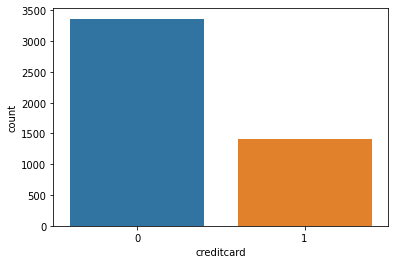

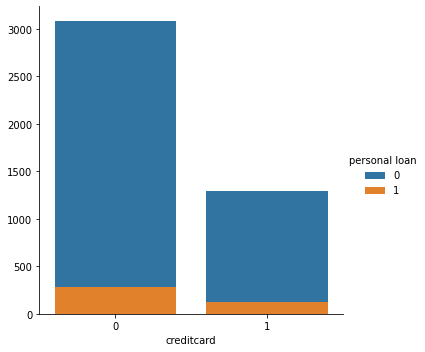

In [366]:
sns.countplot( df4['creditcard'] )
sns.FacetGrid(df4,hue = 'personal loan',size = 5).map(sns.countplot,'creditcard').add_legend()

BLUE - Loan Customers
ORANGE - Did not take Loan



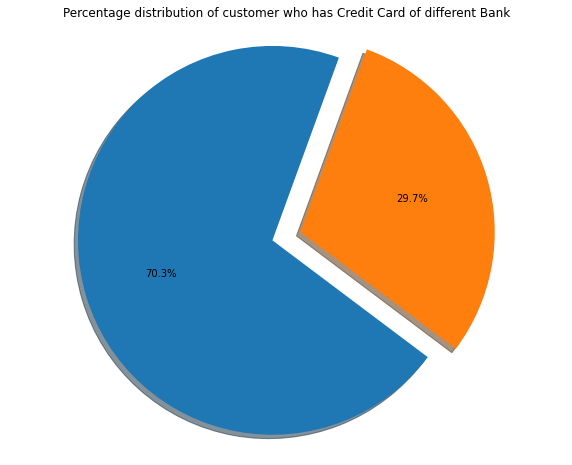

In [367]:
#To check the behaviour of people who use credit card of different bank

condition = (df4['creditcard'] == 0)  & (df4['ccavg'] >= 0 )
temp = df4.loc[condition,'personal loan'].value_counts()         #temp[1] has count of loan customers with given condition
total = df4['personal loan'].value_counts()[1]                   #count of total loan customers
y = total - temp[1]                                             #count of remaining loan customers
                                                                
list_count = [temp[1],y]
temp = pd.DataFrame(list_count,index= ["cc","remaining"])


fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.15)
ax1.pie(temp[0],explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 70)
ax1.axis('equal')
plt.title("Percentage distribution of customer who has Credit Card of different Bank")
print('BLUE', "- Loan Customers")
print("ORANGE", '- Did not take Loan')
print()

observation :

70% of the loan customers have Credit Card of different Bank but also bank has approached less credit card customers of their own so its difficult to make a conclusion

In [368]:
#income_group_not_customer

income_group_not_taken = {}
groups = [("below 40",40),("40-65",65),("65-100",100),("above 100",224)]
for name,group in groups :
  if group == 40 :
    g = 0
  elif group == 65:
    g = 40
  elif  group == 100:
    g=65
  else :
    g = 100
  condition = (df4['income'] <= group) & (df4['income'] > g) & (df4['personal loan'] == 0)
  income_group_not_taken[name] = df4.loc[condition,'personal loan'].count()

x1 = list(income_group_not_taken.keys())
y1 = list(income_group_not_taken.values())
print(x1)
print(y1)

['below 40', '40-65', '65-100', 'above 100']
[1389, 1217, 1137, 630]


In [369]:
#income_group_customer

income_group_taken = {}
#groups = [("below 35",35),("35-45",45),("45-55",55),("55-67",67)]
for name,group in groups :
  if group == 40 :
    g = 0
  elif group == 65:
    g = 40
  elif  group == 100:
    g=65
  else :
    g = 100
  
  condition = (df4['income'] <= group) & (df4['income'] > g) & (df4['personal loan'] == 1)
  income_group_taken[name] = df4.loc[condition,'personal loan'].count()

x2 = list(income_group_taken.keys())
y2 = list(income_group_taken.values())
print(x2)
print(y2)


['below 40', '40-65', '65-100', 'above 100']
[0, 3, 37, 364]


           Count
below 40       0
40-65          3
65-100        37
above 100    364

Lowest Income among Loan Customer is  60



Orange - who did not take Loan 
Red - who did take Loan 



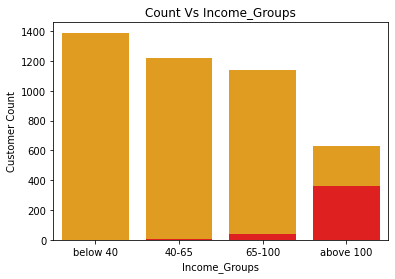

In [370]:
sns.barplot(x = x1,y = y1,color = 'Orange')
plt.title("Count Vs Income_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("Incomes_Groups")

sns.barplot(x = x2,y = y2,color = 'Red')
plt.title("Count Vs Income_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("Income_Groups")

df_income = pd.DataFrame(y2,index = x1,columns = ["Count"])
print(df_income)
print()
min_income_customer = df4.loc[df['personal loan']==1,'income'].min()
print('Lowest Income among Loan Customer is ',min_income_customer)
print()
print()
print()
print("Orange", "- who did not take Loan ")
print("Red", "- who did take Loan ")
print()

observation :

Count of loan customers is significantly high in group of income above 100 though customers approached are least.

In [371]:
#ccavg_group_not_customer

ccavg_group_not_taken = {}
groups = [("below 0.7",0.7),("0.7-1.5",1.5),("1.5-2.5",2.5),("above 2.5",10)]
for name,group in groups :
  if group == 0.7 :
    g = 0
  elif group == 1.5:
    g = 0.7
  elif  group == 2.5:
    g=1.5
  else :
    g = 2.5
  condition = (df4['ccavg'] <= group) & (df4['ccavg'] > g) & (df4['personal loan'] == 0)
  ccavg_group_not_taken[name] = df4.loc[condition,'personal loan'].count()

x1 = list(ccavg_group_not_taken.keys())
y1 = list(ccavg_group_not_taken.values())
print(x1)
print(y1)

['below 0.7', '0.7-1.5', '1.5-2.5', 'above 2.5']
[1228, 1086, 1182, 774]


In [372]:
#ccavg_group_customer

ccavg_group_taken = {}

for name,group in groups :
  if group == 0.7 :
    g = 0
  elif group == 1.5:
    g = 0.7
  elif  group == 2.5:
    g=1.5
  else :
    g = 2.5
  
  condition = (df4['ccavg'] <= group) & (df4['ccavg'] > g) & (df4['personal loan'] == 1)
  ccavg_group_taken[name] = df4.loc[condition,'personal loan'].count()

x2 = list(ccavg_group_taken.keys())
y2 = list(ccavg_group_taken.values())
print(x2)
print(y2)

['below 0.7', '0.7-1.5', '1.5-2.5', 'above 2.5']
[34, 34, 37, 298]


           Count
below 0.7     34
0.7-1.5       34
1.5-2.5       37
above 2.5    298

Loan Customer with Lowest Spending by Credit Card is  0.0



Orange - who did not take Loan 
Red - who did take Loan 



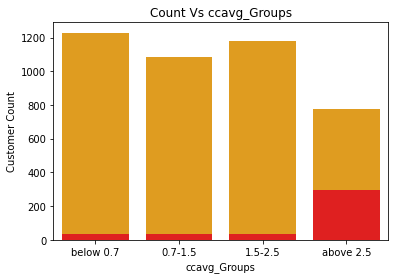

In [375]:
sns.barplot(x = x1,y = y1,color = 'Orange')
plt.title("Count Vs ccavg_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("ccavg_Groups")

sns.barplot(x = x2,y = y2,color = 'Red')
plt.title("Count Vs ccavg_Groups" )
plt.ylabel("Customer Count")
plt.xlabel("ccavg_Groups")

df_income = pd.DataFrame(y2,index = x1,columns = ["Count"])
print(df_income)
print()
min_ccavg_customer = df4.loc[df['personal loan']==1,'ccavg'].min()
print('Loan Customer with Lowest Spending by Credit Card is ',min_ccavg_customer)
print()
print()
print()
print("Orange", "- who did not take Loan ")
print("Red", "- who did take Loan ")
print()

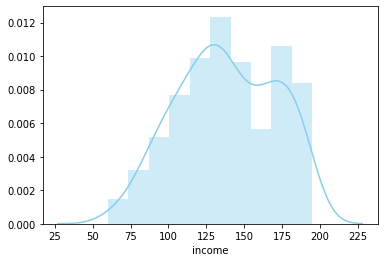

In [376]:
condition = ( df4['ccavg'] >= 2.5 ) & (df4['personal loan'] == 1 )

df_cc_income = df4.loc[condition,'income']

sns.distplot(df_cc_income,color = "skyblue",bins = 10)

observation:

Most of Customers having Spending by Credit card above 2.5 also have income above 100.

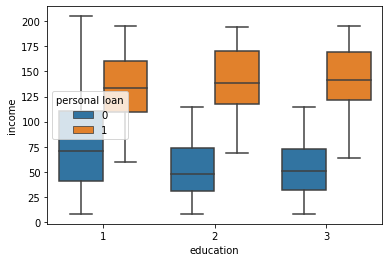

In [377]:
sns.boxplot(x='education',y='income',hue = 'personal loan',data=df4)

observations :

1.  Most of the loan customers have income approximately between 100 to 175 irrespective of education and family

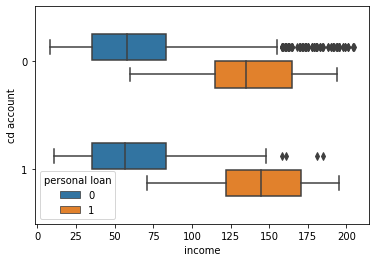

In [378]:
sns.boxplot(x='income',y='cd account',hue = 'personal loan',data=df4,orient = 'h',width = 0.5)

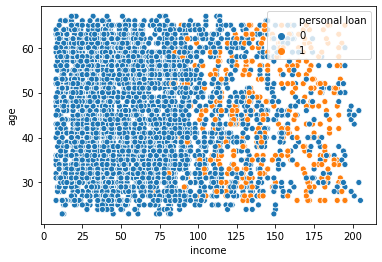

In [379]:
sns.scatterplot(x='income',y='age',data=df4,hue = 'personal loan',)

observation :

Loan Customers have income above approximatley 75, irrespective of age.

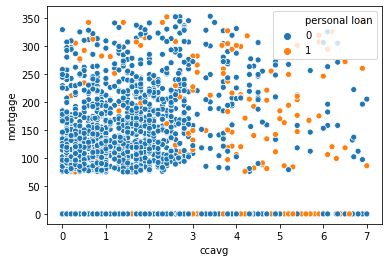

In [380]:
sns.scatterplot(x='ccavg',y='mortgage',data=df4,hue = 'personal loan')

In [381]:
condition =  ( df4['mortgage'] <=200 ) & (df4['ccavg'] <= 2)
count_en = df4.loc[condition,'personal loan'].value_counts()
print(count_en)

0    2948
1      67
Name: personal loan, dtype: int64


observation :

There are scarce count of loan customers in an envelope of mortgage and ccavg less than 200 and 2.0 respectively.

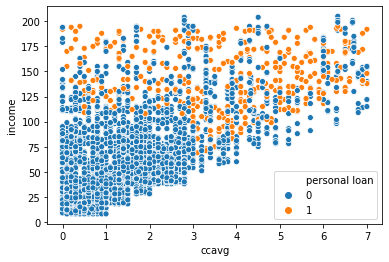

In [382]:
sns.scatterplot(x='ccavg',y='income',data=df4,hue = 'personal loan')

In [383]:
condition =  ( df4['income'] <=100 ) & (df4['ccavg'] <= 3)
count_en = df4.loc[condition,'personal loan'].value_counts()
print(count_en)

0    3590
1       6
Name: personal loan, dtype: int64


observation :

There is scarce count of loan customers in an envelope of income and ccavg less than 100 and 3 respectively except 6 customers

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


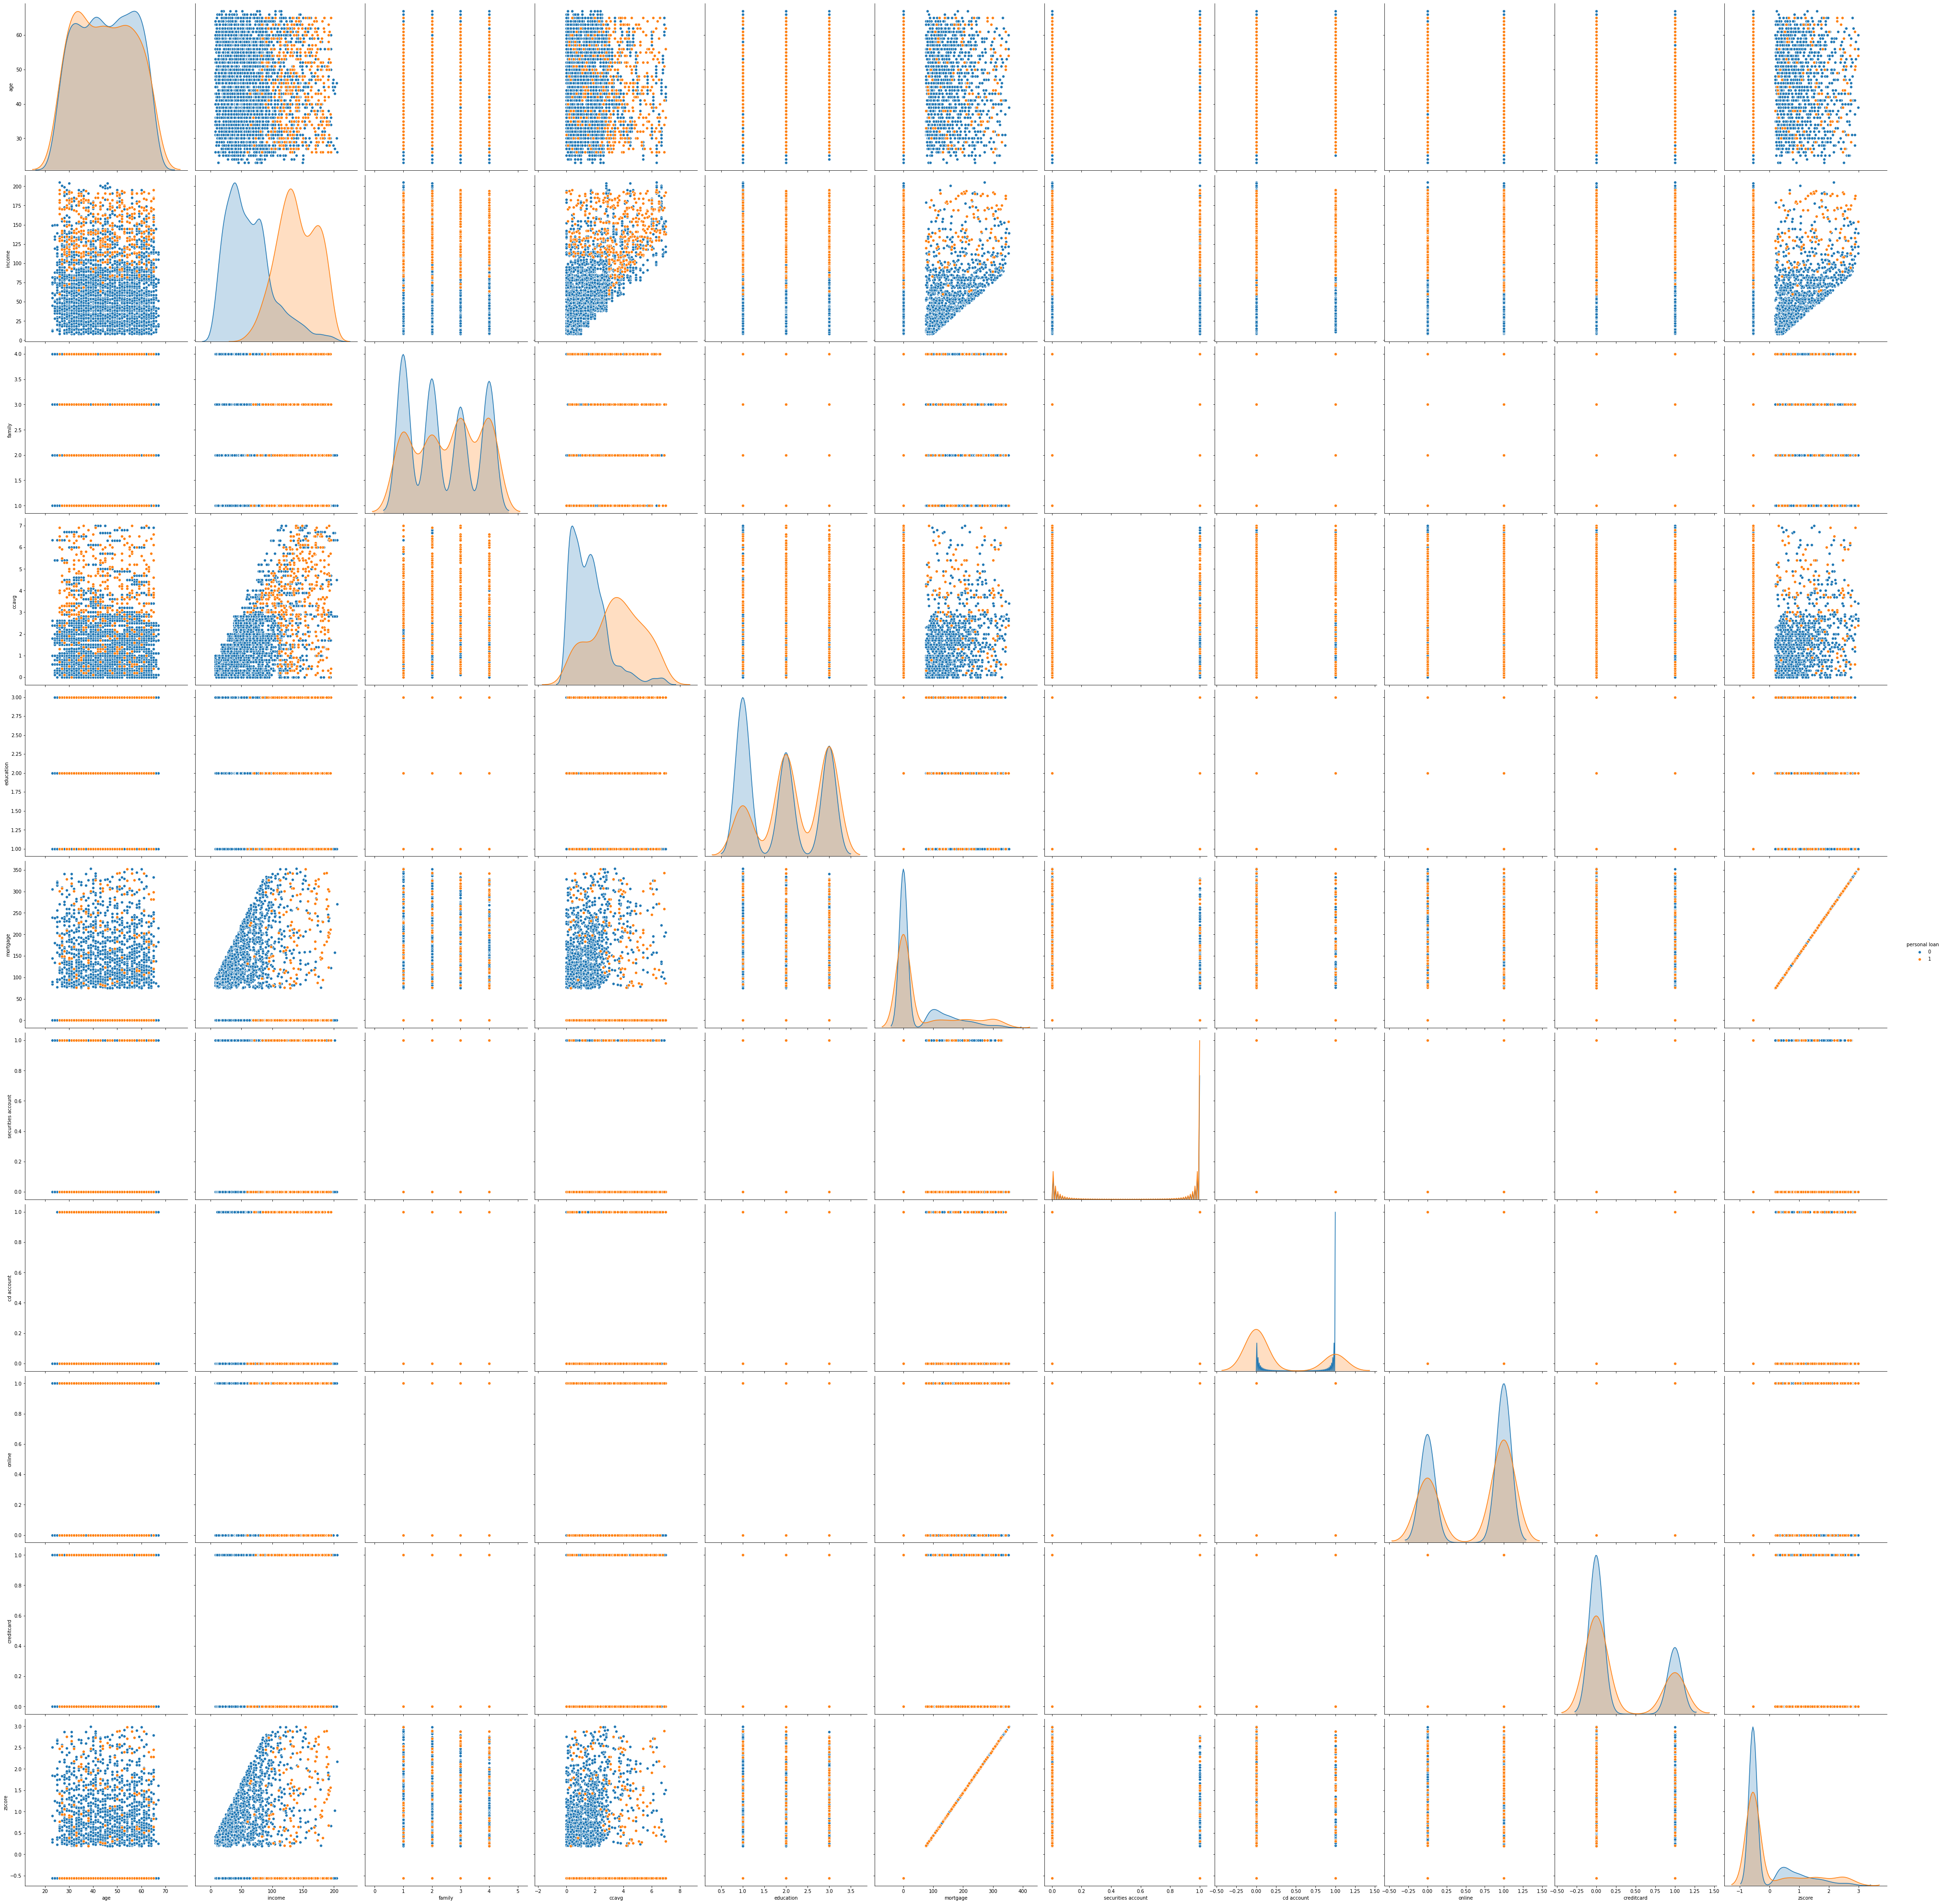

In [384]:
sns.pairplot(df4,size = 5,hue= 'personal loan')

Text(0.5, 1.0, 'correlation matrix')

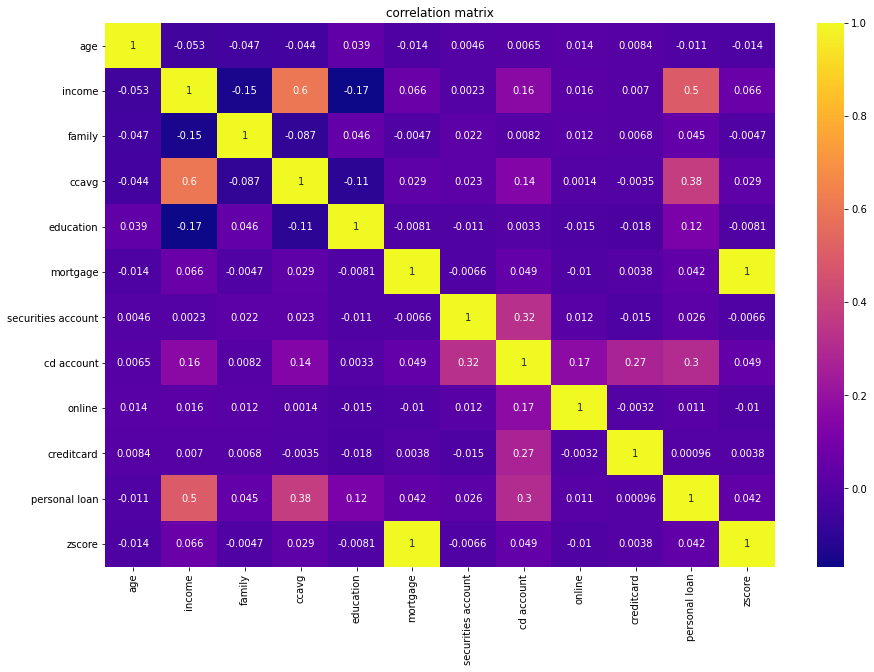

In [385]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df4.corr(),annot = True,cmap = 'plasma',)
plt.title("correlation matrix")

observation :

1. 'income' has strong correlation with the target variable . 
2. 'ccavg' & 'cd account' has moderate correlation with target variable.
3. 'education' has mild correlation with target variable.
2. ccavg and income have high correlation.

# 5) Splitting the Data & Feature Transformation

In [386]:
from sklearn.model_selection import train_test_split

In [387]:
data_X = df4.loc[:,['income','ccavg','cd account','education','family','mortgage','securities account']]
data_Y = df4['personal loan']                       #removed ccavg #added family #mortgage added #added ccavg after normalization

In [388]:
#binning - To reduce skewness of data

data_X['mortgage_b'] = pd.cut(data_X['mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop('mortgage',axis = 1,inplace = True)

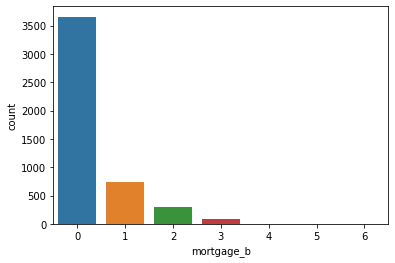

In [389]:
sns.countplot(data_X['mortgage_b'])

In [390]:
#splitting of data by stratified sampling to maintain same distribution of loan customers in both train and test data

X_train,X_test,y_train,y_test = train_test_split(data_X,data_Y,test_size=0.3,random_state=0,stratify = data_Y)

In [391]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

norm = MinMaxScaler().fit(X_test)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [392]:
#Feature Transformation to reduce skewness data

from sklearn.preprocessing import PowerTransformer
X_tr = X_train[['income','ccavg']]
X_te = X_test[['income','ccavg']]
pt = PowerTransformer(method = 'yeo-johnson',standardize = False,)
X_train[['income','ccavg']] = pt.fit_transform(X_tr)
X_test[['income','ccavg']] = pt.transform(X_te)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

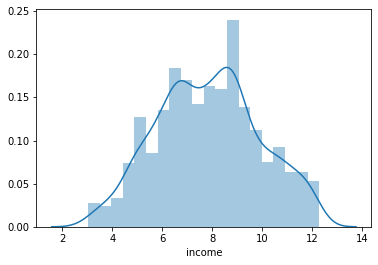

In [393]:
sns.distplot(X_test['income'])

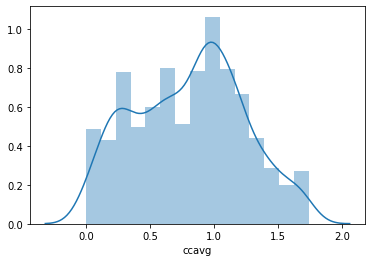

In [394]:
sns.distplot(X_test['ccavg'])

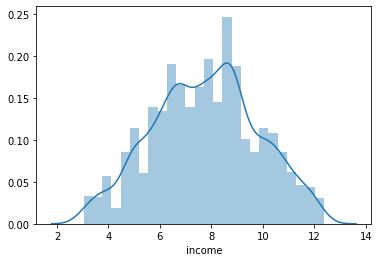

In [395]:
sns.distplot(X_train['income'])

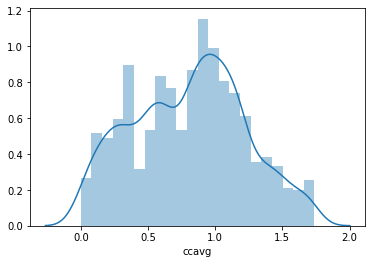

In [396]:
sns.distplot(X_train['ccavg'])

# 6) Machine Learning Model

In [397]:
#Importing logistic Regressiion Library and fitting model 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state =24)

classifier.fit(X_train,y_train)  #fitting data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [398]:
#Predicting on test set

y_pred_test = classifier.predict(X_test) #predicting for test data

In [399]:
#Cross-Validation Score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train , y_train, cv=5)          #stratified KFold For every test set to have same distibution
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.95067265 0.96263079 0.95814649 0.95958084 0.94760479]


In [400]:
 #confusion matrix for test data

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred_test)                             
print(pd.DataFrame(cm))


      0   1
0  1281  32
1    42  79


In [401]:
#metrics

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy_test = accuracy_score(y_test, y_pred_test)                   #accuracy of model for test data

print ("Accuracy on test set is ", accuracy_test)          

Accuracy on test set is  0.9483960948396095


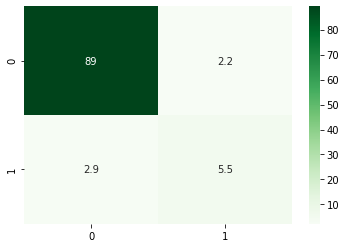

In [402]:
sns.heatmap(cm*100/np.sum(cm), annot=True,cmap='Greens')

In [403]:
y_pred_train = classifier.predict(X_train)                         #predicting on train data

In [404]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on train set is ",accuracy_train)                 #accuracy of model for train data

Accuracy on train set is  0.9557283876757403


In [405]:
#finding probability of prediction
prob = classifier.predict_proba(X_test)
df_p = pd.DataFrame(prob[:,0],columns=['probability'])                    #probability of each prediction
df_p

,probability
0,0.999710
1,0.999231
2,0.999710
3,0.943019
4,0.999993
...,...
1429,0.047919
1430,0.309080
1431,0.999888
1432,0.976524


In [406]:
 #mean sqaured error and r2_score
from sklearn.metrics import mean_squared_error,r2_score                       #mse and r2_score of model for test data
mse = mean_squared_error(y_test,y_pred_test)      
r2_score = r2_score(y_test,y_pred_test)  
print(mse)
print(r2_score)

0.05160390516039052
0.3320702699640593


In [407]:
from sklearn.metrics import mean_squared_error,r2_score                      #mse and r2_score of model for train data
mse = mean_squared_error(y_train,y_pred_train)      
r2_score = r2_score(y_train,y_pred_train)  
print(mse)
print(r2_score)

0.04427161232425965
0.4286657890482459


In [408]:
#classification report of model on test data

report = classification_report(y_test, y_pred_test)                        
 
print (report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.71      0.65      0.68       121

    accuracy                           0.95      1434
   macro avg       0.84      0.81      0.83      1434
weighted avg       0.95      0.95      0.95      1434



  1.Precision increased and recall decreased when ccavg was removed and family was added

  2.Considering mortgage as a feature variable didnt affect the outcome much

  3.Precision and recall increased after normalizing.

  4.Precision and recall increased when normalized first followed by income feature transformation.

Now finally , adding ccavg increased recall but decreased precision which signifies True positive cases have increased along with false positive cases which implies that more potential customers will be appraoched while compromising the cost.

In [409]:
report = classification_report(y_train, y_pred_train)              #classification report of model on train data

print (report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3060
           1       0.80      0.63      0.71       283

    accuracy                           0.96      3343
   macro avg       0.88      0.81      0.84      3343
weighted avg       0.95      0.96      0.95      3343



# 7) Comparision of Classifiers
Comparing all other classifiers to find out the most suitable one.

In [410]:
 #importing all the classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier                      
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [411]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=8)))                          #appending all the classifiers to the list for iteration
models.append(('NaiveBayes', GaussianNB()))
models.append(('RandomnForest',RandomForestClassifier(n_estimators = 1000,max_depth=8)))


In [412]:
#comparison of classifiers


from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
score = {}
accuracy_test = {}
accuracy_train = {}
con_matrix_test = {}
con_matrix_train = {}
report_test = {}
report_train = {}
roc_auc_scores = {}
for name, model in models:
    
    classifier = model

    classifier.fit(X_train,y_train)                                   #fitting data

    y_pred_test = classifier.predict(X_test)                          #predicting on test data

    scores = cross_val_score(classifier, X_train , y_train, cv=5)     #cross_validation_score
    score[name] = scores.mean()                                       #adding it to a dictionary storing all the validation score

    accuracy_te = accuracy_score(y_test, y_pred_test)
    accuracy_test[name] = accuracy_te                                 #adding it to a dictionary storing all the accuracy scores for test data

    cm = confusion_matrix(y_test,y_pred_test)
    con_matrix_test[name] = cm                                        #adding it to a dictionary storing all the confusion matrices for test data


    y_pred_train = classifier.predict(X_train)

    accuracy_tr = accuracy_score(y_train, y_pred_train)
    accuracy_train[name] = accuracy_tr                                #adding it to a dictionary storing all the accuracy scores for train data
    
    roc_auc_scores[name] = roc_auc_score(y_test, y_pred_test)
                                         
    report = classification_report(y_test, y_pred_test)
    report_test[name] = report
    print()                                                           #printing classification report
    print(name)
    print("Classification report of classifier ",name,'on test data')
    print()
    print(report)

    report = classification_report(y_train, y_pred_train)
    report_train[name] = report
    print("Classification report of classifier ",name,'on train data')
    print()
    print(report)

    
    


LogisticRegression
Classification report of classifier  LogisticRegression on test data

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.71      0.65      0.68       121

    accuracy                           0.95      1434
   macro avg       0.84      0.81      0.83      1434
weighted avg       0.95      0.95      0.95      1434

Classification report of classifier  LogisticRegression on train data

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3060
           1       0.80      0.63      0.71       283

    accuracy                           0.96      3343
   macro avg       0.88      0.81      0.84      3343
weighted avg       0.95      0.96      0.95      3343


KNN
Classification report of classifier  KNN on test data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1313
           1    

In [413]:
#to store all the metrics in single dataframe to facilitate easy comparison of performance of all the classifiers
metrics = [score, accuracy_test,accuracy_train,roc_auc_scores] 

comparison = pd.DataFrame(metrics,index = ['cross-validation_score',"accuracy_test",'accuracy_train','roc_auc_score'],) #adding all the metrics in a single dataframe


In [414]:
comparison

,LogisticRegression,KNN,DecisionTree,NaiveBayes,RandomnForest
cross-validation_score,0.955727,0.975173,0.981454,0.923723,0.984147
accuracy_test,0.948396,0.982566,0.983961,0.928870,0.984658
accuracy_train,0.955728,0.982052,0.996111,0.926114,0.993718
roc_auc_score,0.814260,0.915451,0.946224,0.747326,0.927848


In [415]:
for i in con_matrix_test :
  print(i)
  confusion_matrix = pd.DataFrame(con_matrix_test[i])
  print('confusion matrix for ',i,'is ')
  print(confusion_matrix)
  print()

LogisticRegression
confusion matrix for  LogisticRegression is 
      0   1
0  1281  32
1    42  79

KNN
confusion matrix for  KNN is 
      0    1
0  1308    5
1    20  101

DecisionTree
confusion matrix for  DecisionTree is 
      0    1
0  1302   11
1    12  109

NaiveBayes
confusion matrix for  NaiveBayes is 
      0   1
0  1268  45
1    57  64

RandomnForest
confusion matrix for  RandomnForest is 
      0    1
0  1308    5
1    17  104



comparison of accuraccies


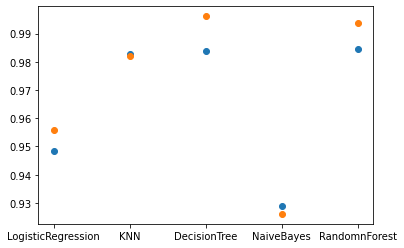

In [416]:
df6 = pd.DataFrame(models)
plt.scatter(df6[0],comparison.loc["accuracy_test",:])
plt.scatter(df6[0],comparison.loc["accuracy_train",:])
print("comparison of accuraccies")


1. From this graph, we can understand that accuracy for training set and test is almost same for logistic regression,KNN, Naives bayes and Randomn Forest classifier which signifies appropriate fitting of data.














# 8) Business Model

**Model Finalization**

1.   High Precision reduces the cost of campaign but may reduce favourable outcome i.e actual target customer prediction.
2.   High Recall may increase the favourable outcome but may increase cost of the campaign

3. Among above classifiers, Randomn Forest classifier has highest precision and recall.


> This Model identifies the potential target customer with 95% precision which suggests that 95% target customers predicted by model are true loan customers.


> This model can predict 86% of the actual target customers which signfies that out of all actual customers, model will identify 86% of actual true customers and does not predict the remaining 14% potential customers.




***Decision*** 

Comparing all the classifiers, we can choose **Randomn Forest** as the classifier for this particular case of required outcome as it has proved to overshoot other classifiers in terms of most of the metrics and most importantly it has optimum trade-off between Precision and Recall.



**Insights**

> ***Target customers having Income above 100***.

1. From Previous Data ploted in comparative barplot, we can see that loan customers have income above 75 and most of them have income 100.

2. It is observed that bank had focused on customers with low income which has not proved to be fruitful and so accounts for low conversion percentage. 

3. The reason behind this maybe is that bank approached customers which are not capable to take loan due financial condition or a low bar has been set by bank.





   



> ***Target Customers having spending by Credit Card above 2.5***

1. From Previous Data ploted in comparative barplot, we can see that most of the loan customers have Spending by Credit Card above 2.5 .

2. Income and CCAvg features are moderately correlated which is visualized in distribution plot of income of  loan customers having Spending by Credit Card above 2.5 .

3. This insight maybe is an obvious relation since people having high income tend to spend more by credit card. 







>***Target Graduate and Advanced/Professional level educated customers***

1. Most of the Loan Customers are Graduated and Advanced/Professional level educated as seen the distribution plot of education feature.

2. This feature is also related to income feature as mostly highly educated people have higher income.

3. Hoewever, it is observed that bank had focused more on undergraduates which generally have low income.







> ***Low Density Envelopes***

Two envelopes are observed in which there is very low density of loan customers :

1. An envelope of mortgage and ccavg less than 200 and 2 respectively.
2. An envelope of income and ccavg less than 100 and 3 respectively.




> Also, interestingly it is also observed that most of the Loan customers have income above 100 irrespective of education and credit card spending which suggests that income feature should be prioritized above all.





> ***Almost 50% of Loan Customers are also CD Account Customers***

1. This insight may be attributed to the trust and satisfaction gained by the bank. 
2. So, CD account customer is 50% likely to take a loan.





> ***Securities Account Customer is less likely to take a loan***

1. These customers are more likely to borrow money to invest in trading than taking a loan 
2. Risk of loss is higher due to applied interest of loan since returns may or may not be more than interest.




***Target Loan Customer Profile***

Loan Customer Profile has following Features.

Feature 1 : Income should be above 100

Feature 2 : Credit Card Spending should be above 2.5

Feature 3 : Graduate and Advanced/Professional level education since higher probability of having high Income

Feature 4 : CD account Customer of Bank

***Conclusion :***

1. The classification model  built and insights from Data will help the Bank to predict the Target Personal Loan Customers before approching them and so can focus their marketing efforts only on these customers.

2. This method of targeted approach will reduce the cost, time and efforts required for campaign and also will avoid unnecessary contact to any customer which will also reduce customer unsatisfaction.

3. This method of approach will also widen the reach of the bank to most of the loan customers of desired profile in optimum cost. 


